# SCIMITAR quickstart

Welcome to SCIMITAR! The main goal of SCIMITAR is to provide a variety of tools to analyze trajectory maps of single-cell measurements. With SCIMITAR you can:

* Obtain coarse-grain, (metastable) state and transition representations of your data. This is useful when you want to get a broad sense of how your data is connected.
* Infer full-fledged Gaussian distribution trajectories from single-cell data --- that is, not only will you get cell orderings and estiamted 'pseudotemporal' mean measurements but also pseudo-time-dependant covariance matrices so you can track how your measurements' correlation change across biological progression. 
* Obtain uncertainties for a cell's psuedotemporal positioning (due to uncertainty arising from heteroscedastic noise) 
* Obtain genes that significantly change throughout the progression (i.e. 'progression-associated genes')
* Obtain genes that significantly change their correlation structure throughout the progression (i.e. 'progression co-associated genes')
* Infer broad co-regulatory states and psuedotemporal dynamic gene modules from the evolving co-expression matrices.

To highlight some of this functionality, we will be analyzing a fetal neuron replicating-to-quiescent single-cell RNA-seq dataset obtained by [Darmanis et al.](http://www.pnas.org/content/112/23/7285.full)

First off, let's read the data. This data has already been preprocessed: it contained only significantly-expressed transcription factors with log-transformed expression values that were corrected for cell cycle effects with [scVLM](https://github.com/PMBio/scLVM).


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

neural_data_df = pd.read_csv('data/darmanis_et_al_expressed_tf_fetal_neurons_scVLM_corrected.csv', sep='\t', 
                             index_col=0)
# The data has 5 columns of metadata and then the expression values. Genes are columns, rows are samples
neural_data_df

,age,c1 chip id,cell type,experiment_sample_name,tissue,FOS,EGR1,TCF4,MEF2C,ZFAND5,...,PRDM8,ZCCHC4,SRF,ZNF669,CARHSP1,ARX,TOP3A,MAX,MLXIP,DLX2
GSM1658003,postnatal 22 years,nochipID15,fetal_quiescent,AB_S3,cortex,0.515775,0.473353,3.925160,7.775373,0.699165,...,3.151865,0.213163,0.750168,0.221774,0.144296,0.420303,0.411334,0.379401,0.168934,0.407216
GSM1658203,prenatal 16-18 W,nochipID10,fetal_replicating,FB_S1,cortex,7.049844,6.753587,7.326629,2.810097,4.484074,...,-0.023815,-0.024474,-0.006547,-0.025463,0.676580,-0.048257,-0.047227,-0.043561,-0.019396,-0.046754
GSM1658204,prenatal 16-18 W,nochipID10,fetal_replicating,FB_S1,cortex,4.991276,7.311186,8.203301,1.271446,0.759738,...,0.225396,0.231631,0.755108,0.240988,0.156797,5.041684,0.446970,0.412271,0.183570,0.442495
GSM1658205,prenatal 16-18 W,nochipID10,fetal_replicating,FB_S1,cortex,5.619502,3.643031,4.718560,5.811829,-0.784840,...,3.263664,1.706626,5.325064,1.360488,-0.161977,-0.471806,-0.461738,-0.425892,0.908977,-0.457115
GSM1658206,prenatal 16-18 W,nochipID10,fetal_replicating,FB_S1,cortex,8.482862,9.398352,6.704714,2.537130,0.203107,...,0.060257,0.061924,0.016564,0.064425,4.563706,3.618605,0.119492,0.110215,1.147687,1.504590
GSM1658207,prenatal 16-18 W,nochipID10,fetal_replicating,FB_S1,cortex,0.409165,0.375512,8.181856,3.326118,0.554649,...,0.164551,0.169103,0.045234,0.175934,0.114470,0.333427,0.326312,0.300979,0.134016,0.323045
GSM1658208,prenatal 16-18 W,nochipID10,fetal_replicating,FB_S1,cortex,0.035763,0.032821,6.826101,7.414154,2.127920,...,1.400677,0.014780,0.003954,0.015377,1.396300,0.029143,0.028521,0.026307,0.011714,0.028236
GSM1658209,prenatal 16-18 W,nochipID10,fetal_replicating,FB_S1,cortex,0.530118,0.486517,7.729502,6.070149,0.718609,...,3.545398,0.219091,0.058606,0.227941,3.644816,0.431991,0.422773,0.389952,0.173632,0.418540
GSM1658210,prenatal 16-18 W,nochipID10,fetal_replicating,FB_S1,cortex,1.692407,-0.355201,6.563199,7.168532,-0.524650,...,-0.155651,-0.159957,-0.042788,-0.166418,-0.108279,-0.315393,1.770779,-0.284700,-0.126767,-0.305572
GSM1658211,prenatal 16-18 W,nochipID10,fetal_replicating,FB_S1,cortex,3.853863,7.281876,7.722355,3.129699,0.293177,...,0.086979,0.089385,2.326495,0.092995,0.060507,0.176243,0.172482,0.159092,0.763985,0.170756


## Coarse-grain models: The metastable graph

To get a broad sense of highly-populated regions of the cell state space and flows of cells connecting them, we use a represntation that we call the *metastable state graph*. In this graph, each node is a highly-dense region, a 'metastable state', and edges represent connections between these 'states'. We use the module's `scimitar.models.MetastableGraph` for this, which can be constructed in a variety of ways. One way is using the `scimitar.models.get_gmm_bootstrapped_metastable_graph` function, which uses a Gaussian mixture model for the metastable states and an effect size test (Cohen's *d*) to assess state connectivity. The confidence of the inferred connectivities is then bootstrapped. The number of states is automatically inferred (using the BIC criterion), but it can also be specified. 

We will wrap up the inference and plotting of the graph in a function.  

/home/tsuname/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/tsuname/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/_methods.py:83: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/tsuname/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/tsuname/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either usi

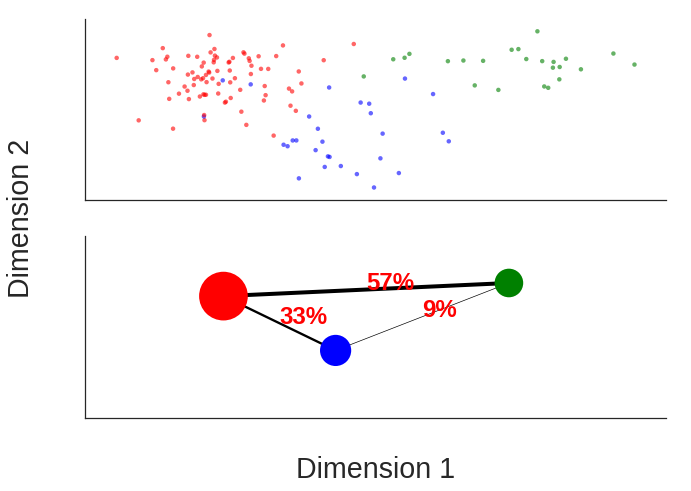

In [2]:
import scimitar.models
import scimitar.plotting
from collections import defaultdict



sns.set_style('white')
sns.set_context('talk', font_scale=2)

# For illustration purposes, we're using number of bootstrap iterations (n_boot) to 20. A reasonable number would be >100
def get_metastable_graph(data_array, covariance_type='diag'):
    results = scimitar.models.get_gmm_bootstrapped_metastable_graph(data_array, n_boot=20,
                                                                    covariance_type=covariance_type)
    metastable_graph, bootstrap_replicates , edge_fractions = results
    metastable_graph.edge_weights = edge_fractions
    
    plt.figure(1, figsize=(10,10))
    plt.clf()
    membership_colors, embedding = scimitar.plotting.plot_metastable_graph(data_array, metastable_graph, 
                                                                           edge_weights=edge_fractions)
    membership_list_dict = defaultdict(list)
    membership_array_dict = {}
    for i, color in enumerate(membership_colors):
        membership_list_dict[color].append(i)
    for color, lst in membership_list_dict.iteritems():
        membership_array_dict[color] = np.array(lst)
    return metastable_graph, membership_array_dict, membership_colors, embedding


# Here and throughout, we will extract the expression data to the neural_data_M array

neural_data_M = neural_data_df.iloc[:, 5:].values
ms_graph, membership_dict, membership_colors, embedding = get_metastable_graph(neural_data_M)

SCIMITAR inferred 3 states, as opposed to the two states marked in the metadata (fetal replicating and fetal quiescent). Note how the graph is fully-connected: all connections are supported by the data in some way, but some have more confidence than others.

## Fully probabilistic models

SCIMITAR also counts with a fully probabilistic representation of transitions between cell states. SCIMITAR uses 'Morphing Gaussian Mixtures' (MGMs) to model these data. MGMs are continuous Gaussian mixtures with a mean and a covariance function $-$ both the expression magnitude as well as the noise (covariance) structure changes during the progression.

### Getting a transition model from the metastable graph

We can obtain this description from the data from the metastable graph object directly, using the `fit_transition_model` method. This method fits a single-curve MGM (describing one transition, i.e., no branching) to the specified states. In our case we use all of our states since the data is describing a single differentiation event.

In [3]:
transition_model, analyzed_indices = ms_graph.fit_transition_model(neural_data_M, states=['blue', 'green', 'red'])
# analyzed_indices are indices of the states specified, in this case we don't really need them since we specified all
# states....the states argument can also be kept to its default, None, which selects all states

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.5515 

Specified shrinkage intensity lambda (correlation matrix): 0.01 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4983 

Specified shrinkage intensity lambda (correlation matrix): 0.01 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4304 

Specified shrinkage intensity lambda (correlation matrix): 0.01 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4326 

Specified shrinkage intensity lambda (correlation matrix): 0.01 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4312 

Specified shrinkage intensity lambda (correlation matrix): 0.01 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4073 

Specified shrinkage intensity lambda (correlation matrix): 0.01 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.3619 

Specified shrinkage intensity lambda (correlation matrix):

### Visualizing the model

Let's see how the model looks like using the `plot_transition_model` in the `plotting` module.

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_neighbors=108, neighbors_algorithm='auto', random_state=None,
            reg=0.001, tol=1e-06)

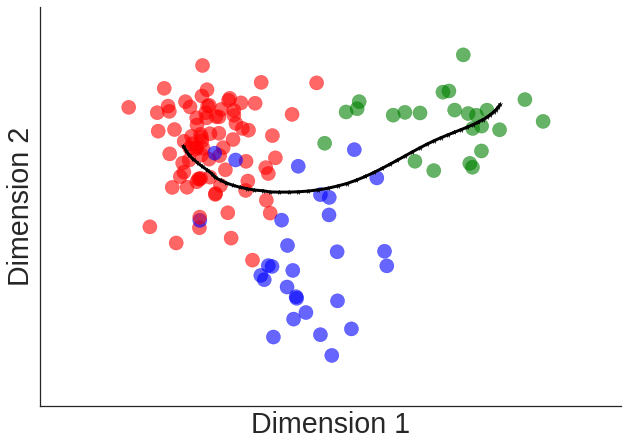

In [4]:
scimitar.plotting.plot_transition_model(neural_data_M,
                                    transition_model, 
                                    colors=membership_colors, 
                                    embedding=embedding,
                                    scatter_plot_args={'s':200, 'alpha':0.6},
                                    plot_errors=False)

### Refining the transition model

The model above is a single iteration of the coordinated ascent routine that optimizes the MGM. Given a good initial cell ordering or pseudotime, this is already a good approximation (see e.g. the visualization above). However, we can further refine this until the model converges.

In [5]:
import scimitar.morphing_mixture as mm
transition_model = mm.morphing_gaussian_from_embedding(neural_data_M, fit_type='spline', degree=3, step_size=0.07,
                                                      cov_estimator='corpcor', cov_reg=0.05)

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.5515 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4983 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4304 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4326 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4312 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4073 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.3619 

Specified shrinkage intensity lambda (correlation matrix):

In [6]:
refined_transition_model, refined_pseudotimes = transition_model.refine(neural_data_M, max_iter=3, step_size=0.07,
                                                                       cov_estimator='corpcor', cov_reg=0.05)

Initializing
Iteration 0
Estimating optimal shrinkage intensity lambda.var (variance vector): 0.6247 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.5281 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4617 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4364 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.4454 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.3677 

Specified shrinkage intensity lambda (correlation matrix): 0.05 

Estimating optimal shrinkage intensity lambda.var (variance vector): 0.3422 

Specified shrinkage intensity lam

This refinement is useful to try out different types of parameters, such as different covariance estimators or step_sizes (which corresponds to kernel width or 'window size' used to smooth out the mean and covariance functions). We can now visualize our refined model, plotting the full PDF (setting `plot_errors=True` in the `plot_transition_model` function).

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_neighbors=108, neighbors_algorithm='auto', random_state=None,
            reg=0.001, tol=1e-06)

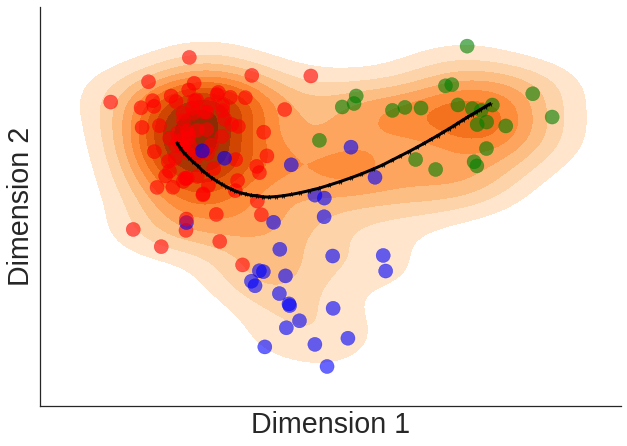

In [7]:

scimitar.plotting.plot_transition_model(neural_data_M,
                                    refined_transition_model, 
                                    colors=membership_colors, 
                                    embedding=embedding, 
                                    scatter_plot_args={'s':200, 'alpha':0.6},
                                    plot_errors=True, n_levels=10)


### Saving transition models

MGM transition models are dill-pickable:

In [8]:
import dill
dill.dump(refined_transition_model, open('quake_neuron_transition_model.pickle', 'w'))
dill.dump(refined_pseudotimes, open('quake_neuron_pseudotimes.pickle', 'w'))

## Getting progression associated genes

There are two main statistical tests in SCIMITAR to test for progression association: a bootstrapped likelihood ratio test that takes into account dynamic (heteroscedastic) noise and an F-test that makes a noise homogeneity assumption (similar to the one used in the EDGE package when analyzing temporal expression).

To do this, we first get a fine-mapped array of means and covariances from our transition model

In [9]:
timepoints = np.arange(0, 1., 0.01)
means = refined_transition_model.mean(timepoints)
covs = refined_transition_model.covariance(timepoints)

Using these means and covariances arrays across pseudotime, we perform each test. The likelihood ratio test is substantially slower than the F-test due to bootstrapping. We adjust the p-values for multiple testing using Benjamini-Hochberg (SCIMITAR simply calls the R package p.adjust). 

In [10]:
import scimitar.differential_analysis
n_genes = neural_data_M.shape[1]
variances = np.array([covs[:, i, i] for i in xrange(n_genes)])
pvals = scimitar.differential_analysis.progression_association_lr_test(neural_data_M, means, variances)
#pvals = scimitar.differential_analysis.progression_association_f_test(neural_data_M, refined_transition_model,
#                                                                      refined_pseudotimes)

corrected_pvals, siggenes = scimitar.differential_analysis.p_adjust(pvals, correction_method='BH', threshold=0.05)

We can now plot our progression-associated genes over pseudotime using a function from the `plotting` package.

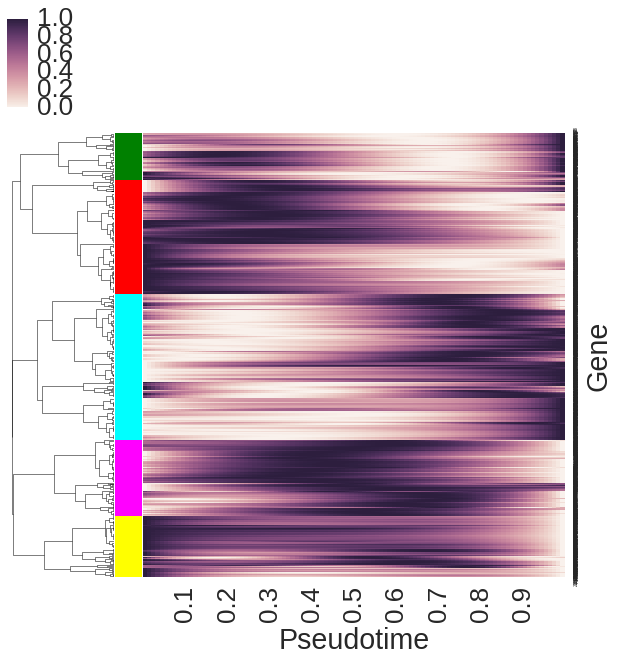

In [11]:
gene_names = neural_data_df.columns[5:]
cluster_members = scimitar.plotting.plot_transition_clustermap(means, gene_names, timepoints, n_clusters=5)

## Getting co-regulatory states

We can leverage the fitted MGM covariance function to get a sense of defined co-regulatory states: covariance structures that persist in swaths of pseudotime. 

First off, let's get the correlation matrices from our covariance matrices.

In [12]:
import scimitar.coexpression
corr_matrices = scimitar.coexpression.get_correlation_matrices(covs) 

Then, we construct a similarity matrix betwen these correlation matrices and plot their similiarities across psuedotime.

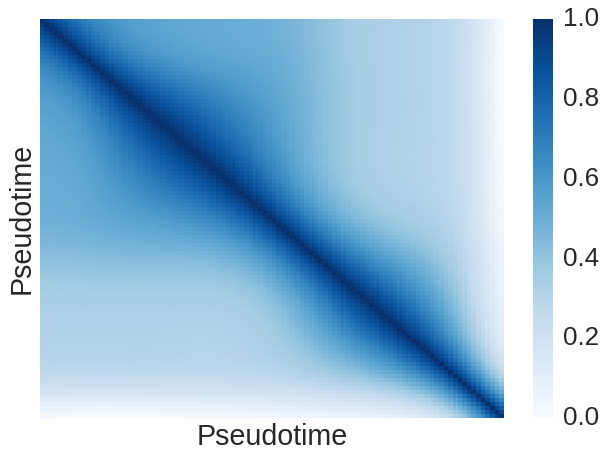

In [13]:
from scipy.spatial.distance import pdist, squareform

n_matrices = corr_matrices.shape[0]
similarity_matrix = np.zeros([n_matrices, n_matrices])
for i in xrange(n_matrices):
    for j in xrange(i + 1, n_matrices):
        mat1 = abs(corr_matrices[i, :, :])
        mat2 = abs(corr_matrices[j, :, :])
        similarity_matrix[i, j] = np.linalg.norm(mat1 - mat2)
        similarity_matrix[j, i] = similarity_matrix[i, j]
        

# Make it a proper similarity matrix, normalize to one
similarity_matrix /= similarity_matrix.max()
similarity_matrix = 1 - similarity_matrix

# Visulize it
sns.set_context('talk', font_scale=2)
sns.heatmap(similarity_matrix, cmap=plt.get_cmap('Blues'))
plt.xticks([])
plt.yticks([])
plt.xlabel('Pseudotime')
plt.ylabel('Pseudotime')

Looks like we have 3 (maybe 4) co-regulatory states!
Let's now take a look at co-expression network centroids for each co-regulatory state. We typically use spectral clustering with the above similarity matrix to get the co-regulatory states.

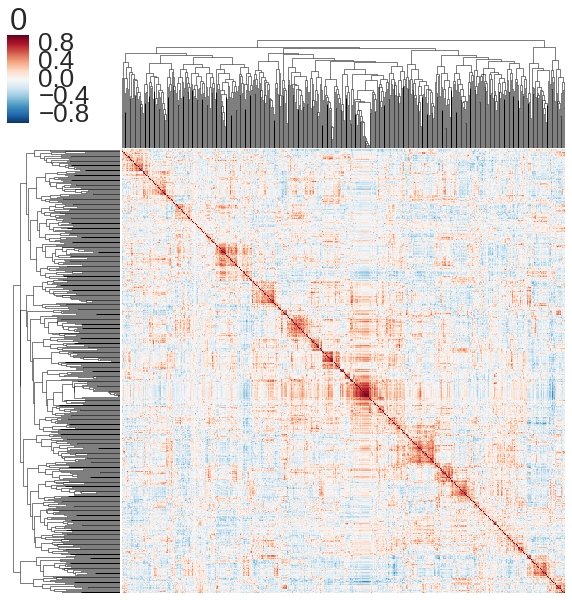

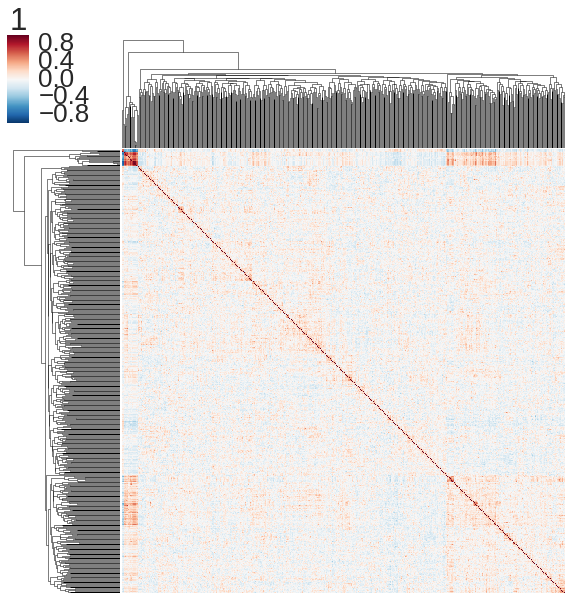

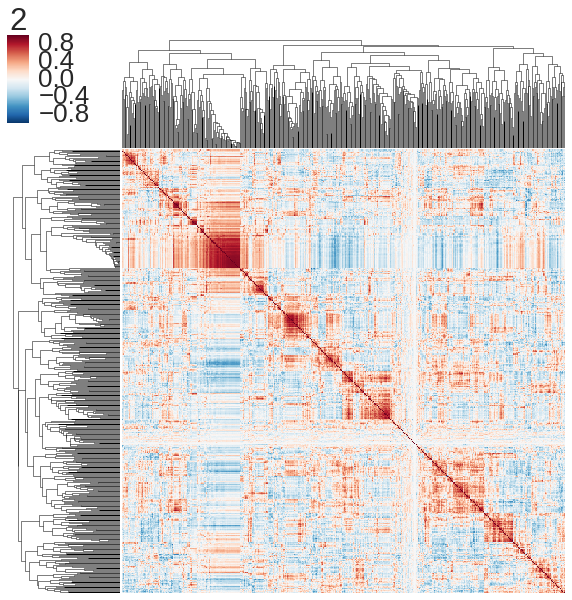

In [14]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=3, affinity='precomputed')
labels = spectral.fit_predict(similarity_matrix)

coreg_states = {}
for ci in np.unique(labels):
    coreg_states[ci] = corr_matrices[labels == ci, :, :].mean(axis=0)


for ci, coreg_state in coreg_states.iteritems():
    cm = sns.clustermap(coreg_state)
    plt.title(ci)
    cm.ax_heatmap.set_xticks([])
    cm.ax_heatmap.set_yticks([])

## That's it!

...for this quick start. Questions or concerns please email Pablo Cordero (@dimenwarper, dimenwarper at gmail dot com or pacorder at ucsc dot com)